In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
TRAIN_DATASET_PATH = "train.csv"
TEST_DATASET_PATH = "test.csv"

In [3]:
train = pd.read_csv(TRAIN_DATASET_PATH)
train.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,61
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,76
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,54
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,57


In [4]:
train.tail()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
9995,9995,44.0,0.0,1700.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,83
9996,9996,51.0,0.0,1700.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,58
9997,9997,34.0,1.0,1250.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,62
9998,9998,33.0,3.0,1100.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56
9999,9999,35.0,0.0,1450.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,52


In [5]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 937.6 KB


In [6]:
train.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,45.878000,1.986800,1699.105000,1.719500,0.375000,0.132900,0.109600,0.053700,0.032100,0.019400,63.737300
std,2886.89568,8.043929,1.772213,524.886654,0.792264,0.484147,0.339484,0.312406,0.225436,0.176274,0.137933,14.705574
min,0.00000,23.000000,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000
50%,4999.50000,46.000000,2.000000,1500.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.000000
max,9999.00000,68.000000,10.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


In [10]:
# Вычисление корреляционной матрицы
corr = train.corr()

In [11]:
# Создать маску для верхнего треугольника
mask = np.triu(np.ones_like(corr, dtype=np.bool))

<ipython-input-11-46a425620225>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


In [ ]:
# НАстройка фигуры matplotlib
f, ax = plt.subplots(figsize=(11, 9))

In [13]:
# Создание пользовательской карты
cmap = sns.diverging_palette(220, 10, as_cmap=True)

<AxesSubplot:>

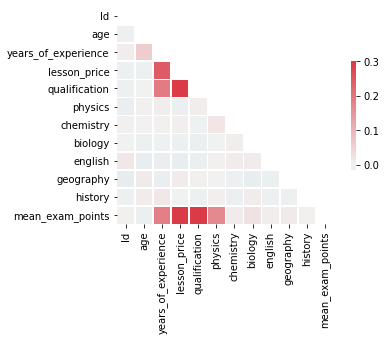

In [14]:
# Создание таблицы на основе исходных данных
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

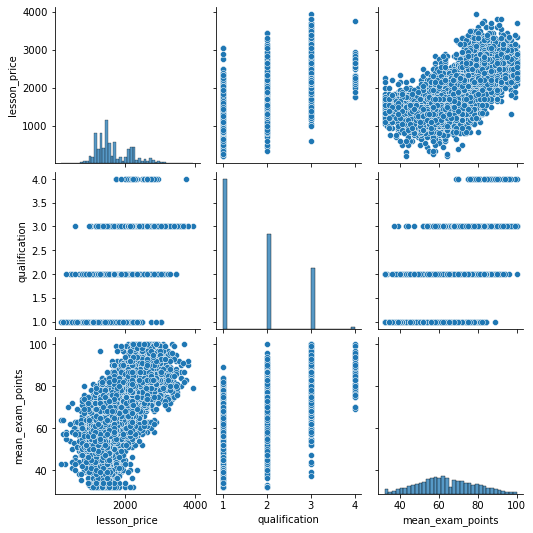

In [15]:
# Гистограммы на основе данных
sns.pairplot(train.loc[:, ['lesson_price', 'qualification', 'mean_exam_points']])

#####  Выберерм метод ROC AUC

In [16]:
# Функция логистической регрессии
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [17]:
# Функция вычисления логарифмической функции потерь(кросс-энтропии)
def calc_logloss(y, y_pred):
    y_pred = np.array(list(map(lambda x: 1e-10 if x == 0 else (1 - 1e-10) if x == 1 else x, y_pred)))
    err = - np.mean(y*np.log(y_pred) + (1.0 - y)*np.log(1.0 - y_pred))
    return np.sum(err)

In [18]:
# Функция вычисления весов и ошибок с использованием штрафов
def logreg_eval_model(X, y, iterations=100, alpha=1e-4, penalty='l2', verbose=False, random_state=42):
    np.random.seed(random_state)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations+1):
        z = np.dot(W, X.T)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        
        if penalty == 'l1':
            regularization = W / np.abs(W)
        elif penalty == 'l2':
            regularization = W
        else:
            regularization = 0
            
        W -= alpha * (1 / n * np.dot((y_pred - y), X)) + regularization
        
        if verbose:
            if i % (iterations / 10) == 0:
                print(f'итерация: {i}, logloss: {np.round(err, 4)}, веса: {W}')
            
    return W, err

In [19]:
# Функция предсказаний
def calc_pred_proba(W, X):
    y_pred_proba = 1 / (1 + np.exp(-np.dot(W, X.T)))
    return y_pred_proba

def calc_pred(W, X, threshold=0.5):
    y_pred_proba = calc_pred_proba(W, X)
    y_pred = np.array([1 if proba >= threshold else 0 for proba in y_pred_proba], dtype = np.int32)
    return y_pred

In [20]:
# Реализация градиентного спуска
def optimize(func, X, y, iterations, alphas, penalty='l1', verbose=False, random_state=42):
    grid = {}
    for iteration in iterations:
        for alpha in alphas:
            W, err = func(X, y, iterations=iteration, alpha=alpha, penalty=penalty, verbose=verbose, random_state=random_state)
            grid[(iteration, alpha)] = err
    result = sorted(grid.items(), key=lambda x: x[1])[0]
    best_iter, best_alpha = result[0]
    best_err = result[1]
    return best_iter, best_alpha, best_err

In [21]:
# Реализация ПОльзовательского стандартного масштабатора
class CustomStandardScaler:
        
    def _calc_mean(self, x):
        return x.mean(axis=0)
    
    def _calc_std(self, x):
        return x.std(axis=0)
    
    def _set_mean(self, mean):
        self._mean = mean
    
    def _get_mean(self):
        return self._mean
    
    def _set_std(self, std):
        self._std = std
        
    def _get_std(self):
        return self._std
    
    def fit(self, x):
        self._set_mean(self._calc_mean(x))
        self._set_std(self._calc_std(x))
    
    def transform(self, x):
        return (x - self._get_mean()) / self._get_std()
    
    def fit_transform(self, x):
        self.fit(x)
        x_transformed = self.transform(x)
        return x_transformed

In [28]:
columns = ['lesson_price', 'qualification']

X = train.loc[:, columns].values
y = train['mean_exam_points'].values

In [29]:
# Валидация
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [30]:
scaler = CustomStandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_valid_std = scaler.transform(X_valid)

In [31]:
iterations, alphas = np.arange(100, 201, 100), np.linspace(0.01, 1.0, 10)

best_iter, best_alpha, best_err = optimize(logreg_eval_model, X_train_std, y_train, iterations, alphas)

print(f'best # of iterations: {best_iter}, best alpha: {best_alpha}, log_loss: {best_err}')

<ipython-input-16-f234324d71a3>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


best # of iterations: 100, best alpha: 0.01, log_loss: -19.473672421535195


In [32]:
W, _ = logreg_eval_model(X_train_std, y_train, best_iter, best_alpha)

In [33]:
y_train_hat = calc_pred_proba(W, X_train_std)
y_valid_hat = calc_pred_proba(W, X_valid_std)

In [34]:
print(f'Train logloss: {calc_logloss(y_train, y_train_hat)}')
print(f'Valid logloss: {calc_logloss(y_valid, y_valid_hat)}')

Train logloss: -1.290394542938295
Valid logloss: -1.6898307079764598


In [35]:
X_std = scaler.fit_transform(X)

In [36]:
W, _ = logreg_eval_model(X_std, y, best_iter, best_alpha)

In [37]:
y_hat = calc_pred_proba(W, X_std)

In [38]:
print(f'Total logloss: {calc_logloss(y, y_hat)}')

Total logloss: -1.3013529802452624


In [39]:
X_test = test.loc[:, columns].values

In [40]:
X_test_std = scaler.transform(X_test)

In [41]:
y_test_hat = calc_pred_proba(W, X_test_std)

In [42]:
submission = pd.DataFrame({'Id': test.index, 'mean_exam_points': y_test_hat})

In [43]:
submission.to_csv('submission.csv', index=False, sep=',', encoding='utf-8')